In [1]:
# markdown settings
from IPython.display import display, HTML # type:ignore
style = '<style> body { font-family: Cambria; font-size: 16px; } </style>'
display(HTML(style))

In [2]:
# importing tensorflow
import tensorflow as tf

In [3]:
# other imports
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import tensorflow_datasets as tfds

In [4]:
# function for displaying images
def showim(images,row=1,col=1):
    n = len(images)
    fig, axarr = plt.subplots(row, col)
    for i,image in enumerate(images):
        axarr[i].imshow(image)


# <div style="font-family:fantasy;">Architecture of the visual cortex</div>
Many nerons in the visual cortex have a small local receptive meaning they react only to visual stimuli located in a limited region of visual field. Authors also showed that some neurons react to images of horizontal lines while other react only to the lines of different orientation. Also two neurons might have same sized receptive field but might react differently to the different lines of orientation. Larger the receptive field more complex patterns can be detected using them. Thus, the higher level neurons are based on the output of neighbouring low level neurons. This powerful architecture is able to detect all sorts of complex patterns in any area of visual field.

Here also each higher level neuron is not connected to all the neurons in the lower level. Thus, here less hyperparam tuning are reuired while dealing with images of millions of pixels unlike mnist that can be easily handled by DNN, CNN solves the problem by partially connected layers and weight sharing.


# <div style="font-family:fantasy;"> Convolution Layer </div>
Neurons in the first CN layer are not connected to every label(pixels) of the input image but only to the ones in their receptive field. This architecture allows the network to concentrate on small lowlevel features in the first hidden layer, then assemble them into larger higher-level features in the next hidden layer and so on.

<img src="https://dsm04pap003files.storage.live.com/y4msoZ_PEXeD_02_IL6K_I6GES1-Tm5nJ6t0IcJUjlltD5Pqzy1_MW6iLPRddUt0UFTzCYnIPtnuZW5vBVZ-E-yXB1HWXJ_Sab-MQH2Zt8xAB-XFgZPoa6agQGOjdkqisAFeobkIsprQ_Ek9wKUpSZijvFIZesAEQ4N1lY47Au-i60OkoD0VoCBDmj8Ek6tzCn2?width=2160&height=1371&cropmode=none" width="356" height="237" />

Also note that unlikw other generic DNN in CNN we do not need to flatten the input to 1D before giving it in the layer. CN layers are 2D layers.

A neuron located in the row i and column j of a given layer is connected to the outputs of previous layer locted in rows i to i+f<sub>h</sub>-1 and columns j to j+f<sub>w</sub>-1. In order that the receptive field of the layer can fit in we add _zero padding_.

![](https://onedrive.live.com/embed?resid=3E88EC0719160DD3%21351916&authkey=%21AM6Y2AlGlek3Or4&width=256&height=999999)

It is also possible to connect a large input layer to small input layer by spacing out the receptive field. This shift of the receptive field from one position to next is called stride.

Thus neurons in m[i][j] is connected to the ouput of neurons in previous layer in rows i $\times$ s<sub>h</sub> to i $\times$ s<sub>h</sub> + f<sub>h</sub>-1 and columns j $\times$ s<sub>w</sub> to j $\times$ s<sub>w</sub> + f<sub>w</sub>-1 where s $_h$ and s $_w$ are horizontal and vertical strides.

### <div style="font-family:fantasy;">Filters</div>
They are nothing but feature detectors.
for example

![](https://onedrive.live.com/embed?resid=3E88EC0719160DD3%21351917&authkey=%21AEATOmdzkTFQwpA&width=78&height=156)

in the above image of handwritten 9 we can detect the following filters which prove to be the identification marks of 9(the ones highlighted in squares).

<img src="https://onedrive.live.com/embed?resid=3E88EC0719160DD3%21351918&authkey=%21ACJSMKcBEogzrGk&width=306&height=152" width="306" height="152" />

we multiplication to detect.\
For instance the vertical filter is a sequence of 0s and 1s with all 1s in the middle vertical line (normally a 7 $\times$ matrix) we multiply this matrix with the one represented by the image via convolution operation and the segment where we get results as 1 depicts that the filter is present there in that location in the parent matrix each convolution operation produces feature maps(FMs) that we stack together to form a 3d layer. Thus using CN for convolution is feature extraction then we use these features in the DNN. These filters are used by neurons as their weights. In layman terms the neurons using a vertical filter will ignore everything in their receptive field except for the central vertical line.

The layers full of neurons using same filter outputs a feature map which highlights the feature areas in the image that activate filter the most. Also during the treaining CN layer will learn the most useful filters for its task and the layers above will learn to combine them into more complex patterns.


### <div style="font-family:fantasy;">Stacking multiple filters</div>
In reality each convolution layer has multiple filters and outputs one FM per feature that are stacked in the form of 3D. CN layer applies many filters to the inputs to detect as many features.

FMs have one neuron per pixel and each neuron in the same FM share same params though they differ from FM to FM, Each meuron in the layer have same receptive field even of they are from different feature map.

If a CNN detects once detects feature it can detect it again at any location using that filter. Input images are composed of multple seublayer called channels. Each channel represent a color. like red, green, blue. Greyscale images just have one.

<img src="https://onedrive.live.com/embed?resid=3E88EC0719160DD3%21351919&authkey=%21AGCBO2lu2pGjP8c&width=999999&height=500" width="auto" height="500" />

### <div style="font-family:fantasy;">Tensorflow implementation</div>
* each  input  image  is  typically  represented  as  a  3D  tensor  of  shape [height,  width,  channels].
* mini-batch  is  represented  as  a  4D  tensor  of  shape  [minibatch  size,  height,  width,  channels].
* weights  of  a  convolutional  layer  are  represented  as  a  4D  tensor  of  shape  [fh,  fw,  fn′,  fn]
* The  bias  terms  of  a  convolutional  layerare simply represented as a 1D tensor of shape [fn]

In [6]:
from sklearn.datasets import load_sample_image
# loading sample image
china = load_sample_image("china.jpg")/255
flower = load_sample_image("flower.jpg")/255
# here we divide by 255 to scale down the pixel values btwn 0 and 1

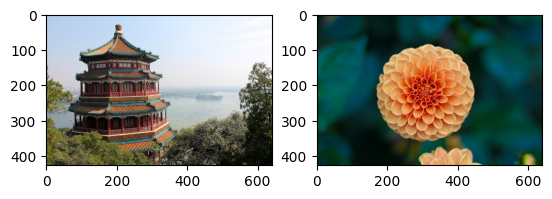

In [6]:
showim([china,flower],1,2)

In [7]:
# storing the parameters
images = np.array([china,flower])
batch_size,height,width,channels = images.shape

In [8]:
#creating filters
filter = np.zeros(shape = (7,7,channels,2))
filter.shape

(7, 7, 3, 2)

In [9]:
# here we create two filters
filter[:,3,:,0] = 1 #that is we did put 1 in the middle column of the first filter as 7//2=3
filter[3,:,:,1] = 1 #that is we did put 1 in the middle row of the second filter as 7//2=3


In [10]:
#now we use convolution operation
outputs = tf.nn.conv2d(images,filter,strides=1,padding="SAME")

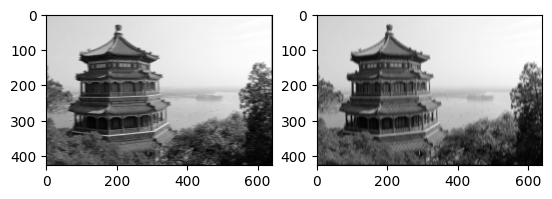

In [11]:
#displaying new image
fig = plt.figure()

# Add two subplots
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Display the images
ax1.imshow(outputs[0,:,:,1],cmap="gray")#this is the second featuremap that is the horizontal one
ax2.imshow(outputs[0,:,:,0],cmap="gray")#this is the first featuremap that is the vertical one


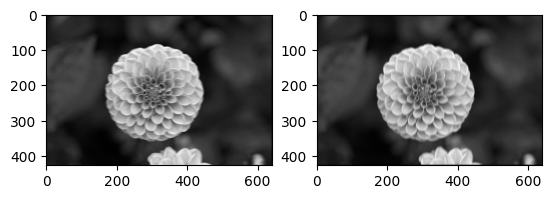

In [12]:
#displaying new image
fig = plt.figure()

# Add two subplots
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Display the images
ax1.imshow(outputs[1,:,:,1],cmap="gray")#this is the second featuremap that is the horizontal one
ax2.imshow(outputs[1,:,:,0],cmap="gray")#this is the first featuremap that is the vertical one

if `padding` is set to `"SAME"` CN lyer uses zero padding if necessary. The output size is set to the number of input neurons divided by stride rounded up.

If `padding` is set to `"VALID"` it ignores the some rows or columns. THat is the receptive field shall strictly lie within the boundaries of the previous layer(or input)

here we created filters manually but we can declare them as variable so that they shall learn various filters by themsleves.


<img src="https://onedrive.live.com/embed?resid=3E88EC0719160DD3%21351920&authkey=%21AGsBtuAnbibfogM&width=500&height=999999" width="500" height="auto" />

In [13]:
conv = keras.layers.Conv2D(
    filters=32,
    kernel_size=3,
    strides=1,
    padding="same",
    activation="relu"
)

This uses 32 filters each 3 $\times$ 3 that is specified by the `kernel_size=3` using 1 stride and `"same"` padding for using zero padding.

Another problem with CNN being usage of RAM especially during backpropagation. This is due to the fact we have several festure maps in a single layer and FM have their own set of neurons making it computationally expensive.

### <div style="font-family:fantasy">Pooling</div>
It is particularly used to shrink the parameters so as to reduce computational load.

The pooling layer does not bear any weights it just applies some function to aggregate the inputs(from some feature map). The fucntion used are max or mean. In max the maximum among the values in the receptive field of neuron in pooling layer is passed as output and then the field moves depending on the stride defined. Say if the stride is 2 then the size of images gets half.

![](https://onedrive.live.com/embed?resid=3E88EC0719160DD3%21351921&authkey=%21AHojN9UYwpHeMpE&width=412&height=227)

### <div style="font-family:fantasy">Tensorflow implementation</div>
For maxpoool layer if size 2 $\times$ 2(or a 2 $\times$ 2 kernel)

In [14]:
max_pool = keras.layers.MaxPool2D(pool_size=2)


In [15]:
#for average pooling
avg_pool = keras.layers.AvgPool2D(pool_size=2)

Other than reducing computations, memory usage, and the number of parameters, a
max  pooling  layer  also  introduces  some  level  of  invariance  to  small  translations,  as
shown in Figure 14-9. Here we assume that the bright pixels have a lower value than
dark  pixels,  and  we  consider  three  images  (A,  B,  C)  going  through  a  max  pooling
layer  with  a  2  ×  2  kernel  and  stride  2.  Images  B  and  C  are  the  same  as  image  A,  but
shifted  by  one  and  two  pixels  to  the  right.  As  you  can  see,  the  outputs  of  the  max
pooling  layer  for  images  A  and  B  are  identical.  This  is  what  translation  invariance
means.  For  image  C,  the  output  is  different:  it  is  shifted  one  pixel  to  the  right  (but
there  is  still  75%  invariance).  By  inserting  a  max  pooling  layer  every  few  layers  in  a
CNN, it is possible to get some level of translation invariance at a larger scale. More‐
over,  max  pooling  offers  a  small  amount  of  rotational  invariance  and  a  slight  scale
invariance. Such invariance (even if it is limited) can be useful in cases where the pre‐
diction should not depend on these details, such as in classification tasks.

<img src="https://onedrive.live.com/embed?resid=3E88EC0719160DD3%21351923&authkey=%21AOTfYGcNjBi8yjY&width=304&height=223" width="304" height="223" />

performing average pooling or max pooling along the depth of layers can help CNN to learn to be invariant to various features. It can say learn several filters each detecting different rotation of the same pattern and can ensure that output is same regardless of rotation.

In [16]:
#implementing pooling along the depth
output = tf.nn.max_pool(
    input=images,
    ksize=(1,1,1,3), # here 3 means the kernel size in the depth dimension
    strides=(1,1,1,3),
    padding="VALID"
)

In [17]:
#creating layer for the depth pooling so as to include it in the model
depth_pool = keras.layers.Lambda(lambda x:tf.nn.max_pool(x,
                                                         ksize=(1,1,1,3), # here 3 means the kernel size in the depth dimension
                                                         strides=(1,1,1,3),
                                                         padding="VALID"
                                                            )
                                    )

Another method being global average pooling. It computes the mean of the complete feature map. Thus for each feature map it just outputs single output. Thus it is really destructive but can be useful for the final output layer of the model.



In [18]:
global_pool = keras.layers.GlobalAvgPool2D()

Though it is equivalent to using lambda layer computing mean over the entitre spatial dimension

In [19]:
global_pool = keras.layers.Lambda(lambda X: tf.reduce_mean(X,axis=[1,2]))

# <div style="font-family:fantasy"> CNN Architecture </div>

Typical CNN architechture stack a few convolution layer followed by a pooling layer then again few convolution layer and soo on. Then it follows a stack of regular feed forward neural network at the top composed of few fully connected layers ReLUs and the final layer outputs for the prediction i.e. a softmax layer(that will estimate the class probabilities). The image spatial dimension gets smaller and smaller but it gets deeper.

<img src="https://onedrive.live.com/embed?resid=3E88EC0719160DD3%21351931&authkey=%21AJTVlLzGcKmREgU&width=660&height=999999" width="660" height="auto" />

<div style="border:2px solid;border-radius:4px;width:50vw;">A common mistake is to use convolution kernels that are too large.
For  example,  instead  of  using  a  convolutional  layer  with  a  5  ×  5
kernel, stack two layers with 3 × 3 kernels: it will use fewer parame‐
ters  and  require  fewer  computations,  and  it  will  usually  perform
better. One exception is for the first convolutional layer: it can typi‐
cally  have  a  large  kernel  (e.g.,  5  ×  5),  usually  with  a  stride  of  2  or
more:  this  will  reduce  the  spatial  dimension  of  the  image  without
losing  too  much  information,  and  since  the  input  image  only  has
three channels in general, it will not be too costly.</div>

In [20]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [22]:
#here we implement the cnn architecture on the fashion mnist dataset.
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="same",
                        input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])



* the first layer uses 64 fairly large filters (7 $\times$ 7) but no strides as the input image is small. The input shape is set to 28,28,1 as it is a single channeled image as it is grey scaled image.
* then we use maxpooling with poolsize of 2 thus the size of the image reduces to the half.
* then we repeat this is structure as discussed before. Also the number of filters increase as we go to the depth. initially the number of low level features are detected(like simple circles and all) then to detect the high level features i.e. the combination of the lower level fetures we double the number of filters. Also as the spatial dimension reduces to half at each iteration thus it is affordable to double the feature maps at each iteration.
* Next is the fully connected network, composed of two hidden dense layers and a
dense  output  layer.  Note  that  we  must  flatten  its  inputs,  since  a  dense  network
expects a 1D array of features for each instance. We also add two dropout layers,
with a dropout rate of 50% each, to reduce overfitting.

### <div style="font-family:fantasy;">LeNet5</div>
It is composed of the following layers.

<img src="https://onedrive.live.com/embed?resid=3E88EC0719160DD3%21351933&authkey=%21ABl0L2liQqA1b_M&width=660&height=999999" width="400" height="auto" />

* here the mnist dataset is used as an example. The mnist size is 28 $\times$ 28 but here it is zero padded to 32. The rest of the layers do not use any padding thus the size keeps on shrinking.
* The average pooling layers are slightly more complex than usual: each neuron
computes the mean of its inputs, then multiplies the result by a learnable coefficient (one per map) and adds a learnable bias term (again, one per map), then finally applies the activation function.
* Most neurons in C3 maps are connected to neurons in only three or four S2
maps (instead of all six S2 maps).
* In the output layer instead of computing the matrix multiplication of inputs and weight vector, it computes the square of euclidean distance between the weight vector and the input vector. Each neurons output measures how much the image belong to a particular class. cross-entropy cost functio is now preferred as it penalizes bad predictions much more, producting larger gradient and converginf faster.3


### <div style="font-family:fantasy;">AlexNet</div>

<img src="https://onedrive.live.com/embed?resid=3E88EC0719160DD3%21351935&authkey=%21AC3QZjxjgi_-gNg&width=660&height=999999" width="660" height="auto" />

<img src="https://onedrive.live.com/embed?resid=3E88EC0719160DD3%21351952&authkey=%21AF3VXc-jIezZymI&width=660&height=999999" width="660" height="auto" />

To reduce overfitting authors used two regularization techniques. First 50% dropout [chapter 11](https://colab.research.google.com/drive/1Rb9DvUKcoAh1xYFo3m5wkEX_uFZqafx5#scrollTo=VDRn26ofuEGV) is applied to the output layers F9 and F10. Next data augmentation is performed by randomly shifting the training images by various offsets, flipping them horizontally and changing the lighting conditions.

<div style="border:2px solid;border-radius:4px;width:50vw;">
data augmentation is the method of increasing the size of the dataset by inserting realistic variants of the instances so that the model does not overfit. we can create instances by picking up an instance and then slightly rotating it by some angle or shifting horizontally or vertially. This forces the model to be to be tolerant to such variations. For making the model tolerant to the different lighting conditions we can generate images with various contrasts.
</div>

AlexNet also uses competitive normalization step immediately after layers C1 and C3 called local response normalization. Here the most strongly activated neurons inhibit other neurons located at the same poition in the neighbouring feature map. This helps different feature maps to specialize pushong them apart and forcing them to explore a wider range of features ultimately improving generalization. 


$$
b_i = a_i(k+\alpha\sum_{j=j_{low}}^{j_{high}}a_j^2)^{-\beta} \ with \ 
\begin{cases}
  j_{high} = min(i+\frac{r}{2},f_n-1) \\
  j_{low} = max(0,i-\frac{r}{2})
\end{cases}
$$

* $b_i$ is the normalized output of the neuron located in feature map i, at some row u
and column v (note that in this equation we consider only neurons located at this
row and column, so u and v are not shown).
* $a_i$ is the activation of that neuron after the ReLU step, but before normalization.
* k,  α,  β,  and  r  are  hyperparameters.  k  is  called  the  bias,  and  r  is  called  the  depth
radius.
* $f_n$ is the number of feature maps.

For example, if r = 2 and a neuron has a strong activation, it will inhibit the activation
of the neurons located in the feature maps immediately above and below its own.

In AlexNet, the hyperparameters are set as follows: r = 2, α = 0.00002, β = 0.75, and
k  =  1.  This  step  can  be  implemented  using  the  <code style="font-size: medium;color:rgb(189, 255, 65);font-weight: 300">tf.nn.local_response_normaliza
tion()</code>  function  (which  you  can  wrap  in  a  <code style="font-size: medium;color:rgb(189, 255, 65);font-weight: 300">Lambda</code>  layer  if  you  want  to  use  it  in  a
Keras model).

### <div style="font-family:fantasy;">GoogLeNet</div>


GoogLeNet  is  actually  one  tall  stack,  including  nine  inception modules. The six numbers in the inception modules represent the number of feature maps output by each convolutional layer in the module. All the convolution layers use ReLU as activations

#### <div style="font-family:fantasy;">Inception Network</div>
When designing a layer for the conv net we might need to pick wheather we need a 1 $\times$ 3 or 3 $\times$ 3 or 5 $\times$ 5 filter or a pooling layer. Inception layer says why shouldn't we do them all at the same time.

<img src="https://onedrive.live.com/embed?resid=3E88EC0719160DD3%21351956&authkey=%21APtl8byXyKbDmUM&width=660&height=999999" width="660" height="auto" />


the above is the diagram for the inception layer which applies all the operations and concatenates them depth wise. The depth wise concatenation can be done using <code style="font-size: medium;color:rgb(189, 255, 65);font-weight: 300">tf.concat</code> with <code style="font-size: medium;color:rgb(189, 255, 65);font-weight: 300">axis=3</code> so as to concat according to the depth dimension.

*The problem of computational cost and the bottle neck solution to it*

<img src="https://onedrive.live.com/embed?resid=3E88EC0719160DD3%21351962&authkey=%21AAGID8_LtLV36yw&width=660&height=593" width="660" height="auto" />

here, we have 32 filters each 5x5x192 and each of the 32 filters will be applied on 28x28 shaped channels
thus total cost being 28x28x32x5x5x192 = 120 million. This is too muchhhh😮

Now we see the bottle neck apprach for it that reduces this cost by 10 times

<img src="https://onedrive.live.com/embed?resid=3E88EC0719160DD3%21351959&authkey=%21ANZlYysnbtar7ZA&width=660&height=620" width="660" height="auto" />

here we can see we have 2 parts 

part1 computation cost: 1x1x192x28x28x16 = 2.4 million\
part2 computation cost: 28x28x32x5x5x16 = 10.0 million

total 12.4 million. That is 10 times lower that the cost we computed previously. Thus using 1x1 conv layer dramatically reduces the computation cost. It also reduces the hyperparams. Finally it is capable of capturing features to the depth.




#### <div style="font-family:fantasy;">inception module</div>
It takes the input which is activation or output from the previos layer. We use bottle neck conv inception here.

<img src="https://onedrive.live.com/embed?resid=3E88EC0719160DD3%21351957&authkey=%21AD3BQXwFCfIohRQ&width=660&height=999999" width="660" height="auto" />

we use same padding for max-pool as we need to oncatenate the layers. Also after max-pool we add another 1x1 conv layer so as to reduce the computation as max-pool will create same number of channels or FMs which are too much for instance here 192

here is rather a more simplified image of the convolution module.

<img src="https://onedrive.live.com/embed?resid=3E88EC0719160DD3%21351963&authkey=%21AL5oXVR2VLFMNMo&width=450&height=262" width="450" height="262" />

Now we shall learn about GoogLeNet

<img src="https://onedrive.live.com/embed?resid=3E88EC0719160DD3%21351960&authkey=%21AAQ_lKUyX-fZZ98&width=1649&height=876" width="1649" height="876" />



A rather more simpler version to it is 

<img src="https://onedrive.live.com/embed?resid=3E88EC0719160DD3%21351961&authkey=%21AAsjiIHCjzNsMdA&width=516&height=396" width="516" height="396" />


* The first two layers divide the image’s height and width by 4 (so its area is divided
by 16), to reduce the computational load. The first layer uses a large kernel size so
that much of the information is preserved.
* Then the local response normalization layer ensures that the previous layers learn
a wide variety of features (as discussed earlier).
* Two  convolutional  layers  follow,  where  the  first  acts  like  a  bottleneck  layer.  As
explained  earlier,  you  can  think  of  this  pair  as  a  single  smarter  convolutional
layer.
* Again, a local response normalization layer ensures that the previous layers cap‐
ture a wide variety of patterns.
* Next,  a  max  pooling  layer  reduces  the  image  height  and  width  by  2,  again  to
speed up computations.
* Then  comes  the  tall  stack  of  nine  inception  modules,  interleaved  with  a  couple
max pooling layers to reduce dimensionality and speed up the net.
* Next, the global average pooling layer outputs the mean of each feature map: this
drops  any  remaining  spatial  information,  which  is  fine  because  there  was  not
much spatial information left at that point. Indeed, GoogLeNet input images are
typically  expected  to  be  224  ×  224  pixels,  so  after  5  max  pooling  layers,  each
dividing  the  height  and  width  by  2,  the  feature  maps  are  down  to  7  ×  7.  More‐
over,  it  is  a  classification  task,  not  localization,  so  it  does  not  matter  where  the
object  is.  Thanks  to  the  dimensionality  reduction  brought  by  this  layer,  there  is
no  need  to  have  several  fully  connected  layers  at  the  top  of  the  CNN  (like  in
AlexNet),  and  this  considerably  reduces  the  number  of  parameters  in  the  net‐
work and limits the risk of overfitting.
* The last layers are self-explanatory: dropout for regularization, then a fully con‐
nected layer with 1,000 units (since there are 1,000 classes) and a softmax activa‐
tion function to output estimated class probabilities

### <div style="font-family:fantasy;">VGGNet</div>
developed at Visual Geometry Group (VGG) research
lab  at  Oxford thus comes the name.
It  had  a  very  simple  and  classical  architecture,  with  2  or  3
convolutional layers and a pooling layer, then again 2 or 3 convolutional layers and a
pooling  layer,  and  so  on  (reaching  a  total  of  just  16  or  19  convolutional  layers,
depending on the VGG variant), plus a final dense network with 2 hidden layers and
the output layer. It used only 3 × 3 filters, but many filters.

<img src="https://onedrive.live.com/embed?resid=3E88EC0719160DD3%21351966&authkey=%21ANU3Q38xS5m8RIE&width=1260&height=709" width="1260" height="709" />

### <div style="font-family:fantasy;">ResNet</div>

They are built of something called as residual block

<img src="https://onedrive.live.com/embed?resid=3E88EC0719160DD3%21351969&authkey=%21ADAd-oPRuc0o9ZE&width=660&height=999999" width="660" height="auto" />

here we first apply the linear operator\
$z^{[l+1]} = w^{[l+1]}a^{[l]}+b^{[l+1]}$

and then we use ReLU\
$a^{[l+1]} = g(z^{[l+1]})$

where $g$ is the ReLU function applied on $z^{[l+1]}$

similarly,\
$z^{[l+2]} = w^{[l+2]}\cdot a^{[l+1]}+b^{[l+2]}$

and then we again use ReLU\
$a^{[l+2]} = g(z^{[l+2]})$

This was the generic case but in residual module we copy $a^{[l]}$ and add it before using the ReLU activation in the last step rather than traversing through the path.

This is called skip connection.

<img src="https://onedrive.live.com/embed?resid=3E88EC0719160DD3%21351972&authkey=%21AON5vhGelsp55Yo&width=164&height=240" width="164" height="240" />

*why resnets*

A network too deep can work poorly on training set. But ResNets are not the same. They are deep but still work well as defined by the graph

<img src="https://onedrive.live.com/embed?resid=3E88EC0719160DD3%21351965&authkey=%21ALePIXxM_C8z-EQ&width=660&height=999999" width="660" height="auto" />

let's say we have this neural network 

<img src="https://onedrive.live.com/embed?resid=3E88EC0719160DD3%21351970&authkey=%21AGLfsJt0ZjRLvlI&width=660&height=999999" width="660" height="auto" />

Now we add ResNet to make it deeper by two more layers by adding a single resnet module 

<img src="https://onedrive.live.com/embed?resid=3E88EC0719160DD3%21351971&authkey=%21AEuVscDekkWeLxs&width=660&height=999999" width="660" height="auto" />

We use ReLU at each layer.\
Thus,\
$a^{[l+2]}=g(z^{[l+2]}+a^{[l]})$ = $g(w^{[l+2]}\cdot a^{[l+1]}+b^{[l+2]}+a^{[l]})$\
Now if we put $w^{[l+2]}$ = 0 and also for the sake of convinience, $b^{[l+2]}$. Then we get,\
$a^{[l+2]}=g(a^{[l]}) = a^{[l]}$. 

Thus, the identity function is easy for the residual block to learn.

But in generic deep neural network it is hard to choose parameters so as to learn the identity function thus making it worse. While with ResNet we just transfer the activation.

*problem of unequal dimensions*

If say $z^{[l+2]}$ and $a^{[l]}$ have different dimensions say 256(so as $a^{[l+2]}$) and 128 respectively. Then we multiply a vector $w_s$ of dimension 256 x 128 and then perform the step $a^{[l+2]}$ = $g(z^{[l+2]}+w_s\cdot a^{[l]})$

This is done to make the dimension of two additions subparts equal.

So, finally we stack the resnet modules appropriately to make such a network.
Here is an example for the same,

![](https://onedrive.live.com/embed?resid=3E88EC0719160DD3%21351967&authkey=%21AC96xFY_r5IYd4U&width=1262&height=999999)

Note that the number of feature maps is doubled every few residual units, at the same
time as their height and width are halved (using a convolutional layer with stride 2).
When this happens, the inputs cannot be added directly to the outputs of the residual
unit  because  they  don’t  have  the  same  shape . To solve this problem,  the  inputs are  passed  through  a  1  ×  1  convolutional  layer  with  stride  2  and  the right number of output feature maps.

<img src="https://onedrive.live.com/embed?resid=3E88EC0719160DD3%21352114&authkey=%21AINF7D7mhLCrzIk&width=611&height=313" width="611" height="313" />



### <div style="font-family:fantasy;">Xception</div>
They are the combination of resnet and GoogLeNet. They replace the inception modules with some special *depth wise separable* convolution layer.

Regular convolution uses filter that try to simultaneously capture spatial dimension(circle,square, oval) and cross channel patterns (like mouth+eyes+nose = face) or (circle+vertical line = 9). A separable conv layer separately sees them both.

Thus what it does is to apply single spatial filer to each input feature maps, then it applies exclusively cross channel patterns filters (the depth ones) i.e a regular but with 1X1 filter

<img src="https://onedrive.live.com/embed?resid=3E88EC0719160DD3%21351974&authkey=%21AKJgqZSLru_gokA&width=500&height=400" width="500" height="400" />

Since separable conv layerss have only one spatial filter per input channel thus we should avoid it for layers with too few channels. Thus they are not directly used after the input layer. Input is passed through 2 regular conv layers then passed through these separable layers and also a few max pooling layers and usual final output layers are used as well.

Inception uses 1x1 conv layers explicitlyfor cross channel patters and then regular conv on top of it. Thus inception modules are in between regular conv layers and xceptoion layers. Thus also for this reason xception is considered a variant of GoogLeNet



### <div style="font-family:fantasy;">SENet</div>
It adds a small neural network called SE block or squeeze and excitation block to every unit of the original structures of inception networks pr resnets.

<img src="https://onedrive.live.com/embed?resid=3E88EC0719160DD3%21351973&authkey=%21AHiW3EWULdkffJg&width=533&height=312" width="533" height="312" />

The se block analyzes the output of the block within. It focusses on the depth dimensions and learns which features are usually most active together then uses this information to recalibrate the feture maps.

As an example if mouth nose and eyes appear together in a pic. The block sees this as a strong activation in mouth and nose but mild one in the eyes FMs then it will boosr the eye feature maps.

<img src="https://onedrive.live.com/embed?resid=3E88EC0719160DD3%21351975&authkey=%21ABxrFvtMaFHTyr8&width=746&height=282" width="746" height="282" />

It is basically composed of a global average pooling layer, a hidden layer activated by relu and a final dense output layer using sigmoid.

<img src="https://onedrive.live.com/embed?resid=3E88EC0719160DD3%21351976&authkey=%21AM4wCJF9uuvJRg4&width=420&height=296" width="420" height="296" />

* The first layer is self explanatory. It is simply global average pooling layer. 
* The next layer is where this squeeze thing happens. This does have several times less neurons say if the input have 256 FM then it shall have just 16 neurons. The input gets compressed to such a small vector (here 16 dimensions). This is a low dimensional vector representation of the distribution feature responses.
* Finally the output layer takes this as an input and outputs a recalibration vector containing one number per input feture map(i.e 256 here) each between 0 and 1. The feature maps are then multiplied by these vectors so as to filter out the most relevant features by multiplying with 1 and irrelevant features by multiplyting less relevant features with values less than 1.


# <div style="font-family:fantasy;">Implementing ResNet-34 using keras</div>

<img src="https://onedrive.live.com/embed?resid=3E88EC0719160DD3%21351972&authkey=%21AON5vhGelsp55Yo&width=164&height=240" width="164" height="240" />

<img src="https://onedrive.live.com/embed?resid=3E88EC0719160DD3%21352114&authkey=%21AINF7D7mhLCrzIk&width=411&height=213" width="411" height="213" />


ResNet-34  is  the  ResNet  with  34  layers  (only  counting  the  convolutional  layers  and
the fully connected layer)17 containing 3 residual units that output 64 feature maps, 4
residual units with 128 maps, 6 residual units with 256 maps, and 3 residual units with 512 maps. 

1. we shall create a residual block

In [23]:
class ResidualBlock(keras.layers.Layer):
    def __init__(self,filters, strides=1,activation="relu",**kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            keras.layers.Conv2D(filters,3,strides=strides,padding="same",use_bias=False),#layer1
            keras.layers.BatchNormalization(),
            self.activation,
            keras.layers.Conv2D(filters,3,strides=1,padding="same",use_bias=False),#layer2 
            keras.layers.BatchNormalization()
            # in both layers we used use_bias=False so as not to use the bias vector because that is the condition we have put for using resnets
        ]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                keras.layers.Conv2D(filters,1,strides=strides,padding="same",use_bias=False),
                keras.layers.BatchNormalization()
            ]
        
    def call(self,inputs): #here we do our main skip connection flow of the inputs
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z+skip_Z) #type: ignore
        #this is where we perform the real addition of ouput to the input so as to make a 
        # function that closely resemebles the identity function

2. next we build the resnet-34 sequential model

In [24]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64,7,strides=2,input_shape=[224,224,3],padding="same",use_bias=False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3,strides=2,padding="same"))
prev_filters = 64
for filters in [64]*3 + [128]*4 + [256]*6 + [512]*3:
    strides = 1 if filters==prev_filters else 2 #if the filters are more then we need to make the stride more so as to cut them short
    model.add(ResidualBlock(filters,strides=strides))
    prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10,activation="softmax"))

here in the loop as described by the architechture of ResNet-34 we have the first 3 RUs have 64 filters, then the next 4 RUs
have  128  filters,  and  so  on. Thus we set the stride to 1 when the number of filters is same as in the previous residual unit or else we set it to 2. Then we add the <code style="font-size: medium;color:#4ec9b0;font-weight: 300">ResidualBlock</code> and finally we update <code style="font-size: medium;color:#4ec9b0;font-weight: 300">prev_filters</code>.

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 112, 112, 64)      9408      
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 64)     256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 112, 112, 64)      0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 residual_block (ResidualBlo  (None, 56, 56, 64)       74240     
 ck)                                                             
                                                      

# <div style="font-family:fantasy">using pretrained model</div>

here we use <code style="font-size: medium;color:#4ec9b0;font-weight: 300">keras.application</code> to import some pretrained cnn models like resnet-50 and use it to train out computer visions. These models are pretrained o image net


In [4]:
model = keras.applications.resnet50.ResNet50(weights="imagenet")

ResNet-50 model accepts 224 x 224 sized images thus we need to use tensorflows <code style="font-size: medium;color:#4ec9b0;font-weight: 300">tf.image.resize()</code> function to resize the images we laod earlier.

In [8]:
images_resized = tf.image.resize(images,[224,224])

The <code style="font-size: medium;color:#4ec9b0;font-weight: 300">tf.image.resize()</code> will not preserve the aspect ratio. If this is
a  problem,  try  cropping  the  images  to  the  appropriate  aspect  ratio
before  resizing.  Both  operations  can  be  done  in  one  shot  with
<code style="font-size: medium;color:#4ec9b0;font-weight: 300">tf.image.crop_and_resize()</code>

The pretrained models assume that the images are preprocessed in a specific way. In
some cases they may expect the inputs to be scaled from 0 to 1, or –1 to 1, and so on.
Each model provides a <code style="font-size: medium;color:#4ec9b0;font-weight: 300">preprocess_input()</code> function that you can use to preprocess
your images. These functions assume that the pixel values range from 0 to 255, so we
must multiply them by 255 (since earlier we scaled them to the 0–1 range)

In [10]:
inputs = keras.applications.resnet50.preprocess_input(images_resized*225) #type:ignore

In [11]:
Y_proba = model.predict(inputs)

1/1 [==============================] - 3s 3s/step


<code style="color:#4ec9b0">Y_proba</code> is a matrix with one row per image and one column per class in this case there are 1000 classes. we can use use <code style="color:#4ec9b0">decode_predictions()</code> to display top k predictions including class name and estimated probability of each predicted class.

In [12]:
top_k = keras.applications.resnet50.decode_predictions(Y_proba,top=10)
for image_index in range(len(images)):
    print(f'Image {image_index}')
    for class_id,name,y_proba in top_k[image_index]:
        print(f'{class_id} - {name:12s} {y_proba*100:.2f}%')
    print()

Image 0
n02825657 - bell_cote    83.29%
n03877845 - palace       5.57%
n03781244 - monastery    3.95%
n02980441 - castle       3.03%
n03028079 - church       0.99%
n02843684 - birdhouse    0.86%
n04346328 - stupa        0.80%
n04435653 - tile_roof    0.36%
n02859443 - boathouse    0.22%
n09332890 - lakeside     0.16%

Image 1
n03530642 - honeycomb    47.97%
n13040303 - stinkhorn    32.99%
n11939491 - daisy        4.14%
n02206856 - bee          3.06%
n12985857 - coral_fungus 2.95%
n04522168 - vase         2.52%
n01950731 - sea_slug     0.99%
n13133613 - ear          0.52%
n13052670 - hen-of-the-woods 0.42%
n13044778 - earthstar    0.30%



# <div style="font-family:fantasy;">Pretrained Models for Transfer learning</div>
If we do not have enough training data it is often good to reuse the lower layers of a pretrained model. This is called *transfer learning*.

Here we classify the flowers from their images by taking the lower layers of the Xception model.


In [13]:
dataset,info = tfds.load("tf_flowers",as_supervised=True,with_info=True) # type: ignore

we have set <code style="font-size: medium;color:skyblue;font-weight: 300">with_info</code> = <code style="font-size: medium;color:dodgerblue;font-weight: 300">True</code> so that we can get information about the dataset.

In [14]:
dataset_size = info.splits["train"].num_examples #3670


In [15]:
class_names  = info.features["label"].names #type: ignore 
# ["dandelion","daisy",...]

In [16]:
n_classes = info.features["label"].num_classes # type: ignore #
#5

here we just got the train set no validation and test set. So we need to split it. we split 10% to test 15% to validation and rest 75% to train

In [17]:
test_set,valid_set,train_set = tfds.load("tf_flowers",split=["train[:10%]", "train[10%:25%]", "train[25%:]"],as_supervised=True) # type: ignore

now as the cnn needs 224 x 224 sized images we need to preprocess them so as to resize them. 

In [18]:
def preprocess(image,label):
    resized_image = tf.image.resize(image,[224,224])
    final_image = keras.applications.xception.preprocess_input(resized_image) #as we are using xception model for transfer learning
    return final_image,label

In [19]:
batch_size = 32
train_set = train_set.shuffle(1000)
train_set = train_set.map(preprocess).batch(batch_size).prefetch(1)
valid_set = valid_set.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set.map(preprocess).batch(batch_size).prefetch(1)


we can also add some extra features in case we want to practice data
augmentation like <code style="font-size: medium;color:#4ec9b0;font-weight: 300">tf.image.random_crop()</code> to randomly the crop the images. we can also flip the images left to right using <code style="font-size: medium;color:#4ec9b0;font-weight: 300">tf.image.random_flip_left_right()</code> and so on.


<div style="border:2px solid;border-radius:4px;width:60vw;">
The <code style="font-size: medium;color:#4ec9b0;font-weight: 300">keras.preprocessing.image.ImageDataGenerator</code> class
makes it easy to load images from disk and augment them in vari‐
ous ways: you can shift each image, rotate it, rescale it, flip it hori‐
zontally or vertically, shear it, or apply any transformation function
you  want  to  it.  This  is  very  convenient  for  simple  projects.  How‐
ever,  building  a  tf.data  pipeline  has  many  advantages:  it  can  read
the images efficiently (e.g., in parallel) from any source, not just the
local disk; you can manipulate the Dataset as you wish; and if you
write  a  preprocessing  function  based  on  tf.image  operations,  this
function  can  be  used  both  in  the  tf.data  pipeline  and  in  the  model
you will deploy to production
</div>

now we load the xception model pretrained on imagenet and we exclude the top layer by setting <code style="font-size: medium;color:skyblue;font-weight: 300">include_top</code> = <code style="font-size: medium;color:dodgerblue;font-weight: 300">False</code>: this shall include the global average pooling layer and dense output layer. We then add our own gloabl average pooling layer based on the output of the base model, followed by a dense output layer with one unit per class using softmax activation functin.

In [20]:
base_model = keras.applications.xception.Xception(weights="imagenet",include_top=False)

In [21]:
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes,activation="softmax")(avg)
model = keras.Model(inputs=base_model.input,outputs = output)

as we know we should freeze the weights of the pretrained layers, at the begining of the training

In [22]:
for layer in base_model.layers:
    layer.trainable = False

Since  our  model  uses  the  base  model’s  layers  directly,  rather  than
the <code style="font-size: medium;color:#4ec9b0;font-weight: 300">base_model</code> object itself, setting <code style="font-size: medium;color:#4ec9b0;font-weight: 300">base_model.trainable=False</code>
would have no effect

In [23]:
# compiling the model
optimizer = keras.optimizers.SGD(learning_rate=0.2,momentum=0.9,weight_decay = 0.01)
model.compile(loss = "sparse_categorical_crossentropy",optimizer = optimizer,metrics = ["accuracy"])

In [45]:
# model fitting
history = model.fit(train_set,epochs=5,validation_data = valid_set)

Epoch 1/5
86/86 [==============================] - 633s 7s/step - loss: 1.7028 - accuracy: 0.7754 - val_loss: 2.5435 - val_accuracy: 0.7677
Epoch 2/5
86/86 [==============================] - 644s 7s/step - loss: 0.7600 - accuracy: 0.8841 - val_loss: 1.3631 - val_accuracy: 0.8094
Epoch 3/5
86/86 [==============================] - 641s 7s/step - loss: 0.4837 - accuracy: 0.9066 - val_loss: 0.9962 - val_accuracy: 0.8566
Epoch 4/5
86/86 [==============================] - 665s 8s/step - loss: 0.3179 - accuracy: 0.9270 - val_loss: 1.3390 - val_accuracy: 0.8167
Epoch 5/5
86/86 [==============================] - 679s 8s/step - loss: 0.4792 - accuracy: 0.9092 - val_loss: 1.2407 - val_accuracy: 0.8367


Now as the top layers are pretty well trained we can unfreeze them and continue the training. This time with a lower learning rate so as to avoid damagin the pretrained weights

In [42]:
for layer in base_model.layers:
    layer.trainable = True

In [25]:
#model compiling
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, weight_decay=0.001)
model.compile(loss = "sparse_categorical_crossentropy",optimizer = optimizer,metrics = ["accuracy"])

In [ ]:
#model fitting
history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=40)

# <div style="font-family:fantasy;">Classification and Localization</div>
Predicting the horizontal and vertical coordinates and height and width of the object's center is a regression. Thus here we have four numbers to predict. It does not require much change to the model. For this we need to add another dense output layer with four units (typically on the top of the global average pooling layer). It can be trained using MSE as loss function.


In [26]:
base_model = keras.applications.xception.Xception(weights="imagenet",include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
class_output = keras.layers.Dense(n_classes,activation="softmax")(avg)
loc_output = keras.layers.Dense(4)(avg)
model = keras.Model(inputs=base_model.input,outputs=[class_output,loc_output])

In [27]:
model.compile(loss=["sparse_categorical_crossentropy","mse"],loss_weights=[0.8,0.2],optimizer = optimizer)

The major problem out here being the flower dataset does not have bounding boxes around the flowers so we need to add them. To anotate images with bounding we may want to use some open source tool like VGG image anotator or crowd source the images on some cloud sourcing platform like amazon's mechanical turk. In case we have large number of images.

Now after obtaining the bounded images we need to create a dataset where items will be in batches of preprocessed images. Each item should be a tuple `(images,class_labels,bounding_boxes)` 

<div style="border:2px solid;border-radius:4px;width:50vw;">
Also the bounding boxes should be normalized, so that all the values should stay btwn 0 and 1.
Also it is common to predict the sqrt of height and width rather than the height and width directly
</div>

some note about the 10 pixel error

<div style="border:2px solid;border-radius:4px;width:50vw;">
In Convolutional Neural Networks (CNNs), the error is calculated by comparing the predicted output with the actual output. The error is then backpropagated through the network to update the weights. The error is usually measured in terms of pixel error or percentage of pixels that are misclassified. A 10 pixel error in CNN means that 10 pixels are misclassified in the output image².
</div>

MSE is fairly well cost function but its metric value is not great. The common metric value. The common metric value being Intersection over union. the  area  of  overlap between  the  predicted  bounding  box  and  the  target  bounding  box,  divided  by  the
area of their union . In `tf.keras`, it is implemented by the
`tf.keras.metrics.MeanIoU` class

![Alt text](image.png)


# <div style="font-family:fantasy;">Object Detection</div>

<img src="https://onedrive.live.com/embed?resid=3E88EC0719160DD3%21352291&authkey=%21ALhNZZ3t0meWBkg&width=481&height=348" width="481" height="348" />

A  common  approach  is  to  take  a  CNN  that  was
trained to classify and locate a single object, then slide it across the image, as shown in the figure above.

* In  this  example,  the  image  was  chopped  into  a  6  ×  8  grid,  and  we
show  a  CNN  (the  thick  black  rectangle)  sliding  across  all  3  ×  3  regions.  When  the
CNN was looking at the top left of the image, it detected part of the leftmost rose, and
then it detected that same rose again when it was first shifted one step to the right

* the  next  step,  it  started  detecting  part  of  the  topmost  rose,  and  then  it  detected  it
again once it was shifted one more step to the right

* we would then continue to slide the  CNN  through  the  whole  image,  looking  at  all  3  ×  3  regions.

Now as the objects can be of different sizes, we can use cnn of different sizes and slide them as done here for 3 x 3 cnn. Like we can use 4 x 4 and so on.

This technique is naive as it detects same image multiple times at slightly different positions. Now Some  post-processing  will  then
be needed to get rid of all the unnecessary bounding boxes. A common approach for this is called *non-max suppression*:

* First,  you  need  to  add  an  extra  objectness  output  to  your  CNN,  to  estimate  the probability  that  a  flower  is  indeed  present  in  the  image. It  must  use  the
sigmoid activation function, and you can train it using binary cross-entropy loss.Then  get  rid  of  all  the  bounding  boxes  for  which  the  objectness  score  is  below some threshold: this will drop all the bounding boxes that don’t actually contain a flower.

* Find  the  bounding  box  with  the  highest  objectness  score,  and  get  rid  of  all  the other  bounding  boxes  that  overlap  a  lot  with  it  (e.g.,  with  an  IoU  greater  than 60%). For  example,  in  Figure  14-24,  the  bounding  box  with  the  max  objectness
score  is  the  thick  bounding  box  over  the  topmost  rose  (the  objectness  score  is represented  by  the  thickness  of  the  bounding  boxes). The other bounding box over the same rose overlaps a lot with max bounding box, so we get rid of it.

* Repeat the previous step until there are no more bounding boxes to get rid of.

This approach works well but is computationally expensive as the cnn runs many times over the image searching for the object. The solution is FCN.

### <div style="font-family:fantasy;">Fully Convoluted Networks</div>

you could replace
the dense layers at the top of a CNN by convolutional layers. To understand this, let’s
look at an example: suppose a dense layer with 200 neurons sits on top of a convolu‐
tional layer that outputs 100 feature maps, each of size 7 × 7 (this is the feature map
size, not the kernel size). Each neuron will compute a weighted sum of all 100 × 7 × 7
activations  from  the  convolutional  layer  (plus  a  bias  term).  Now  let’s  see  what  happens if we replace the dense layer with a convolutional layer using 200 filters, each of
size 7 × 7, and with `"valid"` padding. This layer will output 200 feature maps, each 1
×  1  (since  the  kernel  is  exactly  the  size  of  the  input  feature  maps  and  we  are  using
"valid"  padding).  In  other  words,  it  will  output  200  numbers,  just  like  the  dense
layer  did;  and  if  you  look  closely  at  the  computations  performed  by  a  convolutional
layer, you will notice that these numbers will be precisely the same as those the dense
layer  produced.  The  only  difference  is  that  the  dense  layer’s  output  was  a  tensor  of
shape  [batch  size,  200],  while  the  convolutional  layer  will  output  a  tensor  of  shape
[batch size, 1, 1, 200]

<div style="border:2px solid;border-radius:4px;width:50vw;">
To convert a dense layer to a convolutional layer, the number of filters in the convolutional layer must be equal to the number of units
in  the  dense  layer,  the  filter  size  must  be  equal  to  the  size  of  the
input feature maps, and you must use "valid" padding. The stride
may be set to 1 or more,
</div>

<img src="https://onedrive.live.com/embed?resid=3E88EC0719160DD3%21352292&authkey=%21AL5u19OOLtJ6kRQ&width=657&height=525" width="657" height="525" />

Well, while a dense layer expects a specific input size (since it
has one weight per input feature), a convolutional layer will happily process images of
any  size26  (however,  it  does  expect  its  inputs  to  have  a  specific  number  of  channels, since each kernel contains a different set of weights for each input channel). Since an
FCN  contains  only  convolutional  layers  (and  pooling  layers,  which  have  the  same
property), it can be trained and executed on images of any size!
For example, suppose we’d already trained a CNN for flower classification and locali‐
zation. It was trained on 224 × 224 images, and it outputs 10 numbers: outputs 0 to 4
are sent through the softmax activation function, and this gives the class probabilities
(one per class); output 5 is sent through the logistic activation function, and this gives
the objectness score; outputs 6 to 9 do not use any activation function, and they rep‐
resent the bounding box’s center coordinates, as well as its height and width. We can
now  convert  its  dense  layers  to  convolutional  layers.  In  fact,  we  don’t  even  need  to
retrain it; we can just copy the weights from the dense layers to the convolutional lay‐
ers! Alternatively, we could have converted the CNN into an FCN before training.
Now suppose the last convolutional layer before the output layer (also called the bot‐
tleneck layer) outputs 7 × 7 feature maps when the network is fed a 224 × 224 image
(see the left side of Figure 14-25). If we feed the FCN a 448 × 448 image (see the right
side  of  Figure  14-25),  the  bottleneck  layer  will  now  output  14  ×  14  feature  maps.27
Since the dense output layer was replaced by a convolutional layer using 10 filters of
size 7 × 7, with "valid" padding and stride 1, the output will be composed of 10 fea‐
tures  maps,  each  of  size  8  ×  8  (since  14  –  7  +  1  =  8).  In  other  words,  the  FCN  will
process  the  whole  image  only  once,  and  it  will  output  an  8  ×  8  grid  where  each  cell
contains  10  numbers  (5  class  probabilities,  1  objectness  score,  and  4  bounding  box
coordinates). It’s exactly like taking the original CNN and sliding it across the image
using 8 steps per row and 8 steps per column. To visualize this, imagine chopping the
original image into a 14 × 14 grid, then sliding a 7 × 7 window across this grid; there
will  be  8  ×  8  =  64  possible  locations  for  the  window,  hence  8  ×  8  predictions.  How‐
ever,  the  FCN  approach  is  much  more  efficient,  since  the  network  only  looks  at  the
image once. In fact, You Only Look Once (YOLO) is the name of a very popular object
detection architecture, which we’ll look at next.
488 | Chapter 14: Deep Computer Vision Using Convolutional Neural Networks


### <div style="font-family:fantasy;">YOLO(You Look Only Once)</div>
* For each grid cell, YOLO only considers objects whose bounding box
center lies within that cell. The bounding box coordinates are relative to
that cell, where (0, 0) means the top-left corner of the cell and (1, 1)
means the bottom right. However, the bounding box’s height and width
may extend well beyond the cell.

* It outputs two bounding boxes for each grid cell (instead of just one),
which allows the model to handle cases where two objects are so close
to each other that their bounding box centers lie within the same cell.
Each bounding box also comes with its own objectness score.

* YOLO also outputs a class probability distribution for each grid cell,
predicting 20 class probabilities per grid cell since YOLO was trained
on the PASCAL VOC dataset, which contains 20 classes. This produces
a coarse class probability map. Note that the model predicts one class
probability distribution per grid cell, not per bounding box. However,
it’s possible to estimate class probabilities for each bounding box during
postprocessing, by measuring how well each bounding box matches
each class in the class probability map. For example, imagine a picture
of a person standing in front of a car. There will be two bounding boxes:
one large horizontal one for the car, and a smaller vertical one for the
person. These bounding boxes may have their centers within the same
grid cell. So how can we tell which class should be assigned to each
bounding box? Well, the class probability map will contain a large
region where the “car” class is dominant, and inside it there will be a
smaller region where the “person” class is dominant. Hopefully, the
car’s bounding box will roughly match the “car” region, while the
person’s bounding box will roughly match the “person” region: this will
allow the correct class to be assigned to each bounding box.

